The average solar panel system in Iowa costs $24,930 before the federal tax credit or $17,451 after the credit. This figure assumes that you need a 9 kilowatt (kW) system to offset the average monthly electricity bill of $110 in the state.1

Solar panel installation costs vary based on a number of factors, but the size of your renewable energy system (how many panels you install) is the most significant contributor. So, if you have lower energy needs than the average Iowan, you can save money on solar panels by installing a smaller system.

Most Iowans see pre-tax-credit solar systems costs between $16,600 and $33,240. Solar panel systems are priced per watt, costing an average $2.77 in Iowa. The table below shows how the cost of solar energy systems in Iowa varies by size:

| SIZE OF SOLAR PANEL SYSTEM | IOWA SOLAR PANEL COST | COST AFTER FEDERAL TAX CREDIT | HOME SIZE THIS SYSTEM IS APPROPRIATE FOR|
| --- | --- | --- | --- |
|6 kW | 16,620 | 11,634 | 1,500 sq. ft. |
|7 kW | 19,390 | 13,573 | 1,625 sq. ft. |
|8 kW | 22,160 | 15,512 | 1,750 sq. ft. |
|9 kW | 24,930 | 17,451 | 1,875 sq. ft. |
|10 kW | 27,700 | 19,390 | 2,000 sq. ft. |
|11 kW | 30,470 | 21,329 | 2,125 sq. ft. |
|12 kW | 33,240 | 23,268 | 2,250 sq. ft. |


- from Ecowatch: https://www.ecowatch.com/solar/panel-cost/ia 

ALTERNATE TABLE WITH BETTER RANGES:
https://unboundsolar.com/blog/how-many-solar-panels-to-power-my-home 



In [108]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


In [109]:
data = pd.read_csv("../data/L2/CatBoost_Sales_Price_Predictions_Full.csv", \
                   index_col=False, na_filter=False)

data.head()

,gr_liv_area,ms_sub_class,ms_zoning,lot_frontage,lot_area,alley,lot_shape,land_contour,lot_config,land_slope,...,mo_sold,yr_sold,sale_type,sale_condition,near_rr,near_main_rd,near_pos,house_age_at_sale,construction_age_at_sale,sales_price_predict
0,856,30,RL,80.0,7890,NA,Reg,Lvl,Corner,Gtl,...,3,2010,WD,Normal,0,0,0,71,60,123474.615904
1,1049,120,RL,42.0,4235,NA,Reg,Lvl,Inside,Gtl,...,2,2009,WD,Normal,0,0,0,25,25,133024.548370
2,1001,30,C (all),60.0,6060,NA,Reg,Lvl,Inside,Gtl,...,11,2007,WD,Normal,0,0,0,77,0,111847.007854
3,1039,70,RL,80.0,8146,NA,Reg,Lvl,Corner,Gtl,...,5,2009,WD,Normal,0,0,0,109,6,109593.125039
4,1665,60,RL,70.0,8400,NA,Reg,Lvl,Inside,Gtl,...,11,2009,WD,Normal,0,0,0,8,8,213097.937215


In [110]:
data.filter(regex=('sf|area'))

,gr_liv_area,lot_area,mas_vnr_area,bsmt_fin_sf1,bsmt_fin_sf2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,garage_area,wood_deck_sf,open_porch_sf,pool_area
0,856,7890,0.0,238.0,0.0,618.0,856.0,856,0,0,399.0,0,0,0
1,1049,4235,149.0,552.0,393.0,104.0,1049.0,1049,0,0,266.0,0,105,0
2,1001,6060,0.0,737.0,0.0,100.0,837.0,1001,0,0,216.0,154,0,0
3,1039,8146,0.0,0.0,0.0,405.0,405.0,717,322,0,281.0,0,0,0
4,1665,8400,0.0,643.0,0.0,167.0,810.0,810,855,0,528.0,0,45,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2573,952,8854,0.0,0.0,0.0,952.0,952.0,952,0,0,192.0,0,98,0
2574,1733,13680,0.0,0.0,0.0,0.0,0.0,1733,0,0,452.0,0,0,0
2575,2002,6270,0.0,284.0,0.0,717.0,1001.0,1001,1001,0,871.0,0,0,0
2576,1842,8826,144.0,841.0,0.0,144.0,985.0,985,857,0,486.0,193,96,0


Text(0, 0.5, 'Frequency')

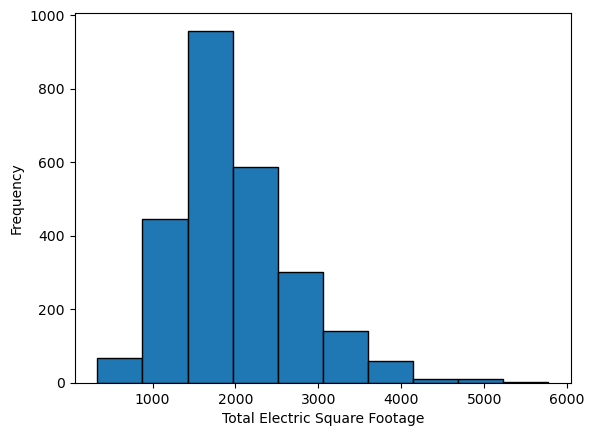

In [111]:
# Total Square Footage that is heated / requires electricity (including garage)
data['total_elec_sf'] = data.bsmt_fin_sf1 + data.gr_liv_area + data.bsmt_fin_sf2

# Plot histogram
plt.hist(data['total_elec_sf'], bins=10, edgecolor='black')

# Set labels and title
plt.xlabel('Total Electric Square Footage')
plt.ylabel('Frequency')

In [112]:
# Read in the system requirements
sys_req = pd.read_csv('../data/ancillary/unboudnsolar_census_based_pvsystemsize.csv')

In [113]:
sys_req.head()

,Square Footage,Typical System Size kW,# of panels (375W),# of panels (315W)
0,250,0.66,2,3
1,500,1.33,4,5
2,750,1.99,6,7
3,1000,2.66,8,9
4,1250,3.32,9,11


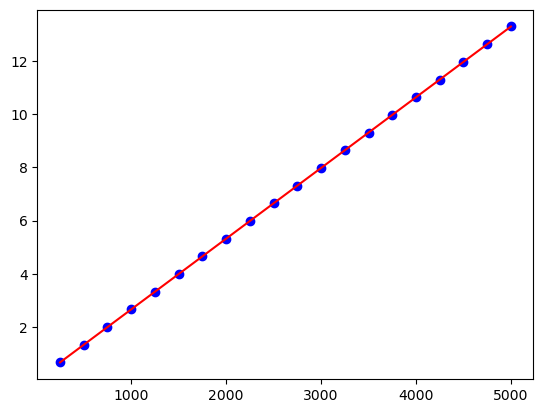

In [114]:
# Bin via scaling / rounding / unscaling the sf estimates in our data

#data['total_elec_sf_binned'] = round(data['total_elec_sf'] / 250.0) * 250.0


# OR REGRESS 
from sklearn.linear_model import LinearRegression

# Split the data into X (features) and y (target)
X = sys_req[['Square Footage']]
y = sys_req['Typical System Size kW']

# Fit the linear regression model
regressor = LinearRegression()
regressor.fit(X, y)


# Plot the regression line and data points
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, regressor.predict(X), color='red', label='Regression Line')

new_feature_elec_sf = data['total_elec_sf']
new_feature_elec_sf = pd.DataFrame(new_feature_elec_sf)
new_feature_elec_sf.rename(columns={'total_elec_sf': 'Square Footage'}, inplace=True)

# create new column with estimated required system size to offset 100% of electrical expenses
data['est_pv_sys_size_kW'] = regressor.predict(new_feature_elec_sf)
data['est_pv_sys_size_kW'] = round(data['est_pv_sys_size_kW'], 3)

In [115]:
data.head()

,gr_liv_area,ms_sub_class,ms_zoning,lot_frontage,lot_area,alley,lot_shape,land_contour,lot_config,land_slope,...,sale_type,sale_condition,near_rr,near_main_rd,near_pos,house_age_at_sale,construction_age_at_sale,sales_price_predict,total_elec_sf,est_pv_sys_size_kW
0,856,30,RL,80.0,7890,NA,Reg,Lvl,Corner,Gtl,...,WD,Normal,0,0,0,71,60,123474.615904,1094.0,2.907
1,1049,120,RL,42.0,4235,NA,Reg,Lvl,Inside,Gtl,...,WD,Normal,0,0,0,25,25,133024.548370,1994.0,5.301
2,1001,30,C (all),60.0,6060,NA,Reg,Lvl,Inside,Gtl,...,WD,Normal,0,0,0,77,0,111847.007854,1738.0,4.620
3,1039,70,RL,80.0,8146,NA,Reg,Lvl,Corner,Gtl,...,WD,Normal,0,0,0,109,6,109593.125039,1039.0,2.761
4,1665,60,RL,70.0,8400,NA,Reg,Lvl,Inside,Gtl,...,WD,Normal,0,0,0,8,8,213097.937215,2308.0,6.137


## Solar Install Cost and Output estimation
#### Maximum System Size
Based on estimated roof size, determine the maximum system size that can be installed
source: https://pvwatts.nrel.gov/pvwatts.php

In [116]:
# create a function to approximate the maximum size Solar Energy System for each property

def max_solar(sf_1):
    '''DocString fill in later'''
    
    # estimated roof squre feet based on standard 33% roof grade
    est_roof_sf = sf_1 * 1.054
    
    est_solar_sf = est_roof_sf * 0.4               # estimated % roof coverage
    panels = est_solar_sf // 17.5                  # sf per panel
    max_pv_sys_size_kW = round(panels * 0.320,3)   # kWatts per panel
    
    return max_pv_sys_size_kW

In [117]:
data['max_pv_sys_size_kW'] = data['1st_flr_sf'].apply(max_solar)

In [118]:
data.head()

,gr_liv_area,ms_sub_class,ms_zoning,lot_frontage,lot_area,alley,lot_shape,land_contour,lot_config,land_slope,...,sale_condition,near_rr,near_main_rd,near_pos,house_age_at_sale,construction_age_at_sale,sales_price_predict,total_elec_sf,est_pv_sys_size_kW,max_pv_sys_size_kW
0,856,30,RL,80.0,7890,NA,Reg,Lvl,Corner,Gtl,...,Normal,0,0,0,71,60,123474.615904,1094.0,2.907,6.40
1,1049,120,RL,42.0,4235,NA,Reg,Lvl,Inside,Gtl,...,Normal,0,0,0,25,25,133024.548370,1994.0,5.301,8.00
2,1001,30,C (all),60.0,6060,NA,Reg,Lvl,Inside,Gtl,...,Normal,0,0,0,77,0,111847.007854,1738.0,4.620,7.68
3,1039,70,RL,80.0,8146,NA,Reg,Lvl,Corner,Gtl,...,Normal,0,0,0,109,6,109593.125039,1039.0,2.761,5.44
4,1665,60,RL,70.0,8400,NA,Reg,Lvl,Inside,Gtl,...,Normal,0,0,0,8,8,213097.937215,2308.0,6.137,6.08


#### Estimated cost of solar install before incentives
Estimated at a price per watt of $3.45

Source: https://www.energysage.com/local-data/solar-panel-cost/

In [119]:
data['cost_before_incentives'] = data['max_pv_sys_size_kW']*1000*3.45
data.head()

,gr_liv_area,ms_sub_class,ms_zoning,lot_frontage,lot_area,alley,lot_shape,land_contour,lot_config,land_slope,...,near_rr,near_main_rd,near_pos,house_age_at_sale,construction_age_at_sale,sales_price_predict,total_elec_sf,est_pv_sys_size_kW,max_pv_sys_size_kW,cost_before_incentives
0,856,30,RL,80.0,7890,NA,Reg,Lvl,Corner,Gtl,...,0,0,0,71,60,123474.615904,1094.0,2.907,6.40,22080.0
1,1049,120,RL,42.0,4235,NA,Reg,Lvl,Inside,Gtl,...,0,0,0,25,25,133024.548370,1994.0,5.301,8.00,27600.0
2,1001,30,C (all),60.0,6060,NA,Reg,Lvl,Inside,Gtl,...,0,0,0,77,0,111847.007854,1738.0,4.620,7.68,26496.0
3,1039,70,RL,80.0,8146,NA,Reg,Lvl,Corner,Gtl,...,0,0,0,109,6,109593.125039,1039.0,2.761,5.44,18768.0
4,1665,60,RL,70.0,8400,NA,Reg,Lvl,Inside,Gtl,...,0,0,0,8,8,213097.937215,2308.0,6.137,6.08,20976.0


## Cost Savings
- Initial Investment (year 0)
 - Sales Tax Exemption
 - Federal Solar Tax Credit (30% install cost)
- Year 1
 - Ames Solar Rebate
- Years 1-5
 - Property Tax Exemption
 - Ames Net metering

### Sales Tax Exemption
Calculate savings based on 6% sales tax exemption for equipment
Equipment is estimated to be 40% of total installation cost

sources:<br>
- https://www.nrel.gov/solar/market-research-analysis/solar-installed-system-cost.html
- https://tax.iowa.gov/iowa-sales-and-use-tax-guide

In [120]:
def sales_tax_savings(cbi):
    pre_tax_cost = cbi/1.06
    equip_cost = pre_tax_cost * 0.4
    equip_tax = equip_cost * 0.06
    return equip_tax

In [121]:
data['sales_tax_savings'] = data['cost_before_incentives'].apply(sales_tax_savings)
data.head()

,gr_liv_area,ms_sub_class,ms_zoning,lot_frontage,lot_area,alley,lot_shape,land_contour,lot_config,land_slope,...,near_main_rd,near_pos,house_age_at_sale,construction_age_at_sale,sales_price_predict,total_elec_sf,est_pv_sys_size_kW,max_pv_sys_size_kW,cost_before_incentives,sales_tax_savings
0,856,30,RL,80.0,7890,NA,Reg,Lvl,Corner,Gtl,...,0,0,71,60,123474.615904,1094.0,2.907,6.40,22080.0,499.924528
1,1049,120,RL,42.0,4235,NA,Reg,Lvl,Inside,Gtl,...,0,0,25,25,133024.548370,1994.0,5.301,8.00,27600.0,624.905660
2,1001,30,C (all),60.0,6060,NA,Reg,Lvl,Inside,Gtl,...,0,0,77,0,111847.007854,1738.0,4.620,7.68,26496.0,599.909434
3,1039,70,RL,80.0,8146,NA,Reg,Lvl,Corner,Gtl,...,0,0,109,6,109593.125039,1039.0,2.761,5.44,18768.0,424.935849
4,1665,60,RL,70.0,8400,NA,Reg,Lvl,Inside,Gtl,...,0,0,8,8,213097.937215,2308.0,6.137,6.08,20976.0,474.928302


### Federal Solar Tax Credit
30% of install cost

source: https://www.energy.gov/sites/default/files/2023-03/Homeowners_Guide_to_the_Federal_Tax_Credit_for_Solar_PV.pdf

In [122]:
data['fed_tax_credit'] = (data['cost_before_incentives'] - data['sales_tax_savings']) * 0.3
data.head()

,gr_liv_area,ms_sub_class,ms_zoning,lot_frontage,lot_area,alley,lot_shape,land_contour,lot_config,land_slope,...,near_pos,house_age_at_sale,construction_age_at_sale,sales_price_predict,total_elec_sf,est_pv_sys_size_kW,max_pv_sys_size_kW,cost_before_incentives,sales_tax_savings,fed_tax_credit
0,856,30,RL,80.0,7890,NA,Reg,Lvl,Corner,Gtl,...,0,71,60,123474.615904,1094.0,2.907,6.40,22080.0,499.924528,6474.022642
1,1049,120,RL,42.0,4235,NA,Reg,Lvl,Inside,Gtl,...,0,25,25,133024.548370,1994.0,5.301,8.00,27600.0,624.905660,8092.528302
2,1001,30,C (all),60.0,6060,NA,Reg,Lvl,Inside,Gtl,...,0,77,0,111847.007854,1738.0,4.620,7.68,26496.0,599.909434,7768.827170
3,1039,70,RL,80.0,8146,NA,Reg,Lvl,Corner,Gtl,...,0,109,6,109593.125039,1039.0,2.761,5.44,18768.0,424.935849,5502.919245
4,1665,60,RL,70.0,8400,NA,Reg,Lvl,Inside,Gtl,...,0,8,8,213097.937215,2308.0,6.137,6.08,20976.0,474.928302,6150.321509


### Initial Investment
calculate initial investment (cost before incentives - sales tax exemption - federal tax credit)

In [123]:
data['initial_investment'] = data['cost_before_incentives'] - data['sales_tax_savings'] - data['fed_tax_credit']
data.head()

,gr_liv_area,ms_sub_class,ms_zoning,lot_frontage,lot_area,alley,lot_shape,land_contour,lot_config,land_slope,...,house_age_at_sale,construction_age_at_sale,sales_price_predict,total_elec_sf,est_pv_sys_size_kW,max_pv_sys_size_kW,cost_before_incentives,sales_tax_savings,fed_tax_credit,initial_investment
0,856,30,RL,80.0,7890,NA,Reg,Lvl,Corner,Gtl,...,71,60,123474.615904,1094.0,2.907,6.40,22080.0,499.924528,6474.022642,15106.052830
1,1049,120,RL,42.0,4235,NA,Reg,Lvl,Inside,Gtl,...,25,25,133024.548370,1994.0,5.301,8.00,27600.0,624.905660,8092.528302,18882.566038
2,1001,30,C (all),60.0,6060,NA,Reg,Lvl,Inside,Gtl,...,77,0,111847.007854,1738.0,4.620,7.68,26496.0,599.909434,7768.827170,18127.263396
3,1039,70,RL,80.0,8146,NA,Reg,Lvl,Corner,Gtl,...,109,6,109593.125039,1039.0,2.761,5.44,18768.0,424.935849,5502.919245,12840.144906
4,1665,60,RL,70.0,8400,NA,Reg,Lvl,Inside,Gtl,...,8,8,213097.937215,2308.0,6.137,6.08,20976.0,474.928302,6150.321509,14350.750189


### Ames Solar Rebate (Year 1)
Calculate the solar rebate value from city of Ames after 1 year of system use <br>
\\$300 per peak kWh (maximum \\$5000) <br>
Sources:<br>
https://unboundsolar.com/blog/how-to-size-solar-system <br>
https://www.cityofames.org/government/departments-divisions-a-h/electric/smart-energy/solar-energy/installing-a-rooftop-solar-energy-system#!/

In [124]:
# calculate rebate based on peak kW hours and efficiency factor
def ames_rebate(max_pv_sys, eff_factor=1.15):
    peak_kwh = max_pv_sys / eff_factor
    rebate = min(5000, 300 * peak_kwh)
    return rebate

In [125]:
data['ames_rebate'] = data['max_pv_sys_size_kW'].apply(ames_rebate)
data.head()

,gr_liv_area,ms_sub_class,ms_zoning,lot_frontage,lot_area,alley,lot_shape,land_contour,lot_config,land_slope,...,construction_age_at_sale,sales_price_predict,total_elec_sf,est_pv_sys_size_kW,max_pv_sys_size_kW,cost_before_incentives,sales_tax_savings,fed_tax_credit,initial_investment,ames_rebate
0,856,30,RL,80.0,7890,NA,Reg,Lvl,Corner,Gtl,...,60,123474.615904,1094.0,2.907,6.40,22080.0,499.924528,6474.022642,15106.052830,1669.565217
1,1049,120,RL,42.0,4235,NA,Reg,Lvl,Inside,Gtl,...,25,133024.548370,1994.0,5.301,8.00,27600.0,624.905660,8092.528302,18882.566038,2086.956522
2,1001,30,C (all),60.0,6060,NA,Reg,Lvl,Inside,Gtl,...,0,111847.007854,1738.0,4.620,7.68,26496.0,599.909434,7768.827170,18127.263396,2003.478261
3,1039,70,RL,80.0,8146,NA,Reg,Lvl,Corner,Gtl,...,6,109593.125039,1039.0,2.761,5.44,18768.0,424.935849,5502.919245,12840.144906,1419.130435
4,1665,60,RL,70.0,8400,NA,Reg,Lvl,Inside,Gtl,...,8,213097.937215,2308.0,6.137,6.08,20976.0,474.928302,6150.321509,14350.750189,1586.086957


### Net Metering (annually, starting Year 1)
City of Ames will pay for electrical energy that residences send back to the electrical grid.<br>
- \\$0.0735 per kWh
Source: https://www.cityofames.org/home/showpublisheddocument/255/637921123589770000

#### Estimated system output & total system usage

source: https://unboundsolar.com/blog/how-to-size-solar-system

In [126]:
# efficiency factor incorporates losses from energy conversion and weather patterns
eff_factor = 1.15

# average daily peak sun hours for Ames, IA
avg_peak_sun_hrs = 4.4

# annual kWh produced (daily * 365)
data['est_kwh_produced'] = ((data['max_pv_sys_size_kW'] * avg_peak_sun_hrs) / eff_factor) * 365

# annual kWh used (daily * 365)
data['est_kwh_used'] = ((data['est_pv_sys_size_kW'] * avg_peak_sun_hrs) / eff_factor) * 365

data.head()

,gr_liv_area,ms_sub_class,ms_zoning,lot_frontage,lot_area,alley,lot_shape,land_contour,lot_config,land_slope,...,total_elec_sf,est_pv_sys_size_kW,max_pv_sys_size_kW,cost_before_incentives,sales_tax_savings,fed_tax_credit,initial_investment,ames_rebate,est_kwh_produced,est_kwh_used
0,856,30,RL,80.0,7890,NA,Reg,Lvl,Corner,Gtl,...,1094.0,2.907,6.40,22080.0,499.924528,6474.022642,15106.052830,1669.565217,8937.739130,4059.688696
1,1049,120,RL,42.0,4235,NA,Reg,Lvl,Inside,Gtl,...,1994.0,5.301,8.00,27600.0,624.905660,8092.528302,18882.566038,2086.956522,11172.173913,7402.961739
2,1001,30,C (all),60.0,6060,NA,Reg,Lvl,Inside,Gtl,...,1738.0,4.620,7.68,26496.0,599.909434,7768.827170,18127.263396,2003.478261,10725.286957,6451.930435
3,1039,70,RL,80.0,8146,NA,Reg,Lvl,Corner,Gtl,...,1039.0,2.761,5.44,18768.0,424.935849,5502.919245,12840.144906,1419.130435,7597.078261,3855.796522
4,1665,60,RL,70.0,8400,NA,Reg,Lvl,Inside,Gtl,...,2308.0,6.137,6.08,20976.0,474.928302,6150.321509,14350.750189,1586.086957,8490.852174,8570.453913


#### Estimated Net Metering Benefit Per Year

In [127]:
data['net_metering_per_yr'] = (data['est_kwh_produced'] - data['est_kwh_used']) * 0.0735
data.head()

,gr_liv_area,ms_sub_class,ms_zoning,lot_frontage,lot_area,alley,lot_shape,land_contour,lot_config,land_slope,...,est_pv_sys_size_kW,max_pv_sys_size_kW,cost_before_incentives,sales_tax_savings,fed_tax_credit,initial_investment,ames_rebate,est_kwh_produced,est_kwh_used,net_metering_per_yr
0,856,30,RL,80.0,7890,NA,Reg,Lvl,Corner,Gtl,...,2.907,6.40,22080.0,499.924528,6474.022642,15106.052830,1669.565217,8937.739130,4059.688696,358.536707
1,1049,120,RL,42.0,4235,NA,Reg,Lvl,Inside,Gtl,...,5.301,8.00,27600.0,624.905660,8092.528302,18882.566038,2086.956522,11172.173913,7402.961739,277.037095
2,1001,30,C (all),60.0,6060,NA,Reg,Lvl,Inside,Gtl,...,4.620,7.68,26496.0,599.909434,7768.827170,18127.263396,2003.478261,10725.286957,6451.930435,314.091704
3,1039,70,RL,80.0,8146,NA,Reg,Lvl,Corner,Gtl,...,2.761,5.44,18768.0,424.935849,5502.919245,12840.144906,1419.130435,7597.078261,3855.796522,274.984208
4,1665,60,RL,70.0,8400,NA,Reg,Lvl,Inside,Gtl,...,6.137,6.08,20976.0,474.928302,6150.321509,14350.750189,1586.086957,8490.852174,8570.453913,-5.850728


### Property Tax Exemption
Residential properties in ames are exempt from property tax increases due to solar installation for 5 years.<br>
sources:<br>
- https://www.storycountyiowa.gov/643/Tax-Levy-Rates
- https://www.iowataxandtags.org/property-tax/calculating-property-taxes/#Note2
- https://www.legis.iowa.gov/docs/code/2020/427.1.pdf

In [128]:
def property_tax_savings(PV, year, r=0.0633, t=range(0,6), val_inc=0.041):
    rollback = 0.5465010
    credit = 4850
    levy = 0.0307
    
    future_value_base = [PV*(1+r)**y for y in t]
    future_value_solar = [(PV*(1+val_inc))*(1+r)**y for y in t]
    
    future_tax_base = [((x * rollback) - credit) * levy for x in future_value_base]
    future_tax_solar = [((x * rollback) - credit) * levy for x in future_value_solar]
    
    tax_savings = [x - y for x, y in zip(future_tax_solar, future_tax_base)]
    
    return tax_savings[year]

In [129]:
data['tax_save_yr_1'] = data['sales_price_predict'].apply(lambda x: property_tax_savings(x, 1))
data['tax_save_yr_2'] = data['sales_price_predict'].apply(lambda x: property_tax_savings(x, 2))
data['tax_save_yr_3'] = data['sales_price_predict'].apply(lambda x: property_tax_savings(x, 3))
data['tax_save_yr_4'] = data['sales_price_predict'].apply(lambda x: property_tax_savings(x, 4))
data['tax_save_yr_5'] = data['sales_price_predict'].apply(lambda x: property_tax_savings(x, 5))

data.head()

,gr_liv_area,ms_sub_class,ms_zoning,lot_frontage,lot_area,alley,lot_shape,land_contour,lot_config,land_slope,...,initial_investment,ames_rebate,est_kwh_produced,est_kwh_used,net_metering_per_yr,tax_save_yr_1,tax_save_yr_2,tax_save_yr_3,tax_save_yr_4,tax_save_yr_5
0,856,30,RL,80.0,7890,NA,Reg,Lvl,Corner,Gtl,...,15106.052830,1669.565217,8937.739130,4059.688696,358.536707,90.312256,96.029022,102.107659,108.571074,115.443623
1,1049,120,RL,42.0,4235,NA,Reg,Lvl,Inside,Gtl,...,18882.566038,2086.956522,11172.173913,7402.961739,277.037095,97.297303,103.456222,110.005001,116.968317,124.372412
2,1001,30,C (all),60.0,6060,NA,Reg,Lvl,Inside,Gtl,...,18127.263396,2003.478261,10725.286957,6451.930435,314.091704,81.807548,86.985966,92.492178,98.346933,104.572293
3,1039,70,RL,80.0,8146,NA,Reg,Lvl,Corner,Gtl,...,12840.144906,1419.130435,7597.078261,3855.796522,274.984208,80.159005,85.233070,90.628323,96.365096,102.465007
4,1665,60,RL,70.0,8400,NA,Reg,Lvl,Inside,Gtl,...,14350.750189,1586.086957,8490.852174,8570.453913,-5.850728,155.864874,165.731121,176.221900,187.376747,199.237695


### Sale Price after solar installation
Assuming a 2% inflation rate for the next 5 years and 4.1% property value increase after installation<br>
sources:<br> 
- https://www.statista.com/statistics/244983/projected-inflation-rate-in-the-united-states/
- https://www.zillow.com/research/solar-panels-house-sell-more-23798/

In [130]:
def sale_price_after_solar(df):
    
    rebate_pv = df['ames_rebate'] / (1.02)**1
    
    net_meter_pv = 0
    for i in range(1,11):
        net_meter_pv += df['net_metering_per_yr'] / (1.02)**i
    
    tax_save_pv = 0
    for i in range(1,6):
        tax_save_pv += df[f'tax_save_yr_{str(i)}'] / (1.02)**i
    
    df['present_savings_value'] = rebate_pv + net_meter_pv + tax_save_pv
    df['sale_price_after_solar'] = df['sales_price_predict']*1.041 + df['present_savings_value']
    df['net_gain'] = df['sale_price_after_solar'] - df['initial_investment'] - df['sales_price_predict']
    
    return df

In [131]:
sale_price_after_solar(data)[['sales_price_predict', 'initial_investment', 'sale_price_after_solar', 'net_gain']].sort_values(by='net_gain', ascending=False)

,sales_price_predict,initial_investment,sale_price_after_solar,net_gain
712,380355.181201,19637.868679,400667.645685,674.595805
5,193299.611510,8308.329057,201413.604693,-194.335873
920,148434.588924,9063.631698,156976.198289,-522.022333
665,338196.526502,18127.263396,355631.667006,-692.122892
74,268699.507939,15861.355472,283725.546324,-835.317086
...,...,...,...,...
358,210078.084161,40786.342642,232107.982094,-18756.444708
996,102664.657250,30967.408302,114812.353400,-18819.712152
2349,133059.985380,38520.434717,151165.653211,-20414.766886
1315,364581.177981,58158.303396,397638.163786,-25101.317591


In [138]:
pd.DataFrame(data=data.loc[712,:]).T

,gr_liv_area,ms_sub_class,ms_zoning,lot_frontage,lot_area,alley,lot_shape,land_contour,lot_config,land_slope,neighborhood,bldg_type,house_style,overall_qual,overall_cond,roof_style,exterior1st,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmt_fin_type1,bsmt_fin_sf1,bsmt_fin_type2,bsmt_fin_sf2,bsmt_unf_sf,total_bsmt_sf,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abv_gr,kitchen_abv_gr,kitchen_qual,tot_rms_abv_grd,functional,fireplaces,fireplace_qu,garage_type,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3_ssn_porch,screen_porch,pool_area,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,sale_condition,near_rr,near_main_rd,near_pos,house_age_at_sale,construction_age_at_sale,sales_price_predict,total_elec_sf,est_pv_sys_size_kW,max_pv_sys_size_kW,cost_before_incentives,sales_tax_savings,fed_tax_credit,initial_investment,ames_rebate,est_kwh_produced,est_kwh_used,net_metering_per_yr,tax_save_yr_1,tax_save_yr_2,tax_save_yr_3,tax_save_yr_4,tax_save_yr_5,present_savings_value,sale_price_after_solar,net_gain
712,2473,60,RL,63.0,12292,NA,IR1,HLS,CulDSac,Gtl,StoneBr,1Fam,2Story,9,5,Hip,VinylSd,BrkFace,184.0,Gd,TA,PConc,Ex,Gd,Gd,GLQ,205.0,Unf,0.0,889.0,1094.0,Ex,1,SBrkr,1102,1371,0,0.0,0.0,2,1,4,1,Gd,11,Typ,1,Gd,BuiltIn,Fin,3.0,675.0,TA,TA,Y,246,39,0,0,0,0,NA,NA,0,7,2006,New,Partial,0,0,0,0,0,380355.181201,2678.0,7.121,8.32,28704.0,649.901887,8416.229434,19637.868679,2170.434783,11619.06087,9944.631304,123.070573,278.20078,295.81089,314.535719,334.44583,355.616251,4717.902055,400667.645685,674.595805


In [137]:
pd.set_option('display.max_columns', None)

KeyError: 'est_pv_sys_size'

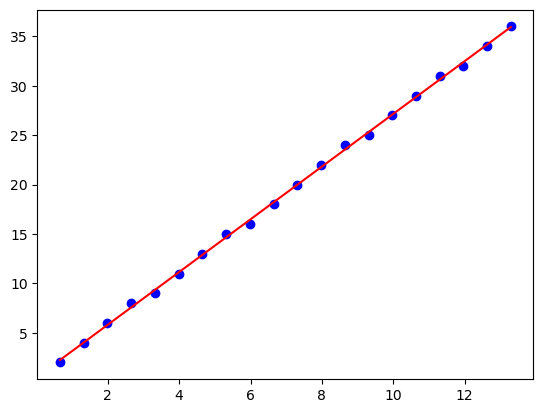

In [9]:
# Regress system size with # of panels

# OR REGRESS 

# Split the data into X (features) and y (target)
X = sys_req[['Typical System Size kW']]
y = sys_req['# of panels (375W)']

# Fit the linear regression model
regressor = LinearRegression()
regressor.fit(X, y)


# Plot the regression line and data points
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, regressor.predict(X), color='red', label='Regression Line')

X_new = data['est_pv_sys_size']

X_new = pd.DataFrame(X_new)
X_new.rename(columns={'est_pv_sys_size_kW': 'Typical System Size kW'}, inplace=True)

data['est_num_375W_panels'] = np.round(regressor.predict(X_new))

In [ ]:
# Split the data into X (features) and y (target)
X = sys_req[['Typical System Size kW']]
y = sys_req['# of panels (315W)']

# Fit the linear regression model
regressor = LinearRegression()
regressor.fit(X, y)


# Plot the regression line and data points
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, regressor.predict(X), color='red', label='Regression Line')

X_new = data['est_pv_sys_size_kW']

X_new = pd.DataFrame(X_new)
X_new.rename(columns={'est_pv_sys_size': 'Typical System Size kW'}, inplace=True)

data['est_num_315W_panels'] = np.round(regressor.predict(X_new))